# Assignment-1 (KNN Classifier)-Part-A
## Handwritten digit recognition
In this assignment part-A, we will use the built-in library ``sklearn`` to use KNN classifier.

## The MNIST dataset
`MNIST` is a classic dataset in machine learning, consisting of 28x28 gray-scale images handwritten digits. The training set contains 60,000 examples and the test set contains 10,000 examples. In this assignment we will further split the training set to take out 12,000 examples as a validation step.

In [1]:
%matplotlib inline
import gzip, os
import numpy as np
import matplotlib.pyplot as plt
import time
from urllib.request import urlretrieve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

In [4]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (60000, 784)
Number of training labels:  60000
Testing dataset dimensions:  (10000, 784)
Number of testing labels:  10000


In [5]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Training set distribution:
{np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}
Test set distribution:
{np.uint8(0): np.int64(980), np.uint8(1): np.int64(1135), np.uint8(2): np.int64(1032), np.uint8(3): np.int64(1010), np.uint8(4): np.int64(982), np.uint8(5): np.int64(892), np.uint8(6): np.int64(958), np.uint8(7): np.int64(1028), np.uint8(8): np.int64(974), np.uint8(9): np.int64(1009)}


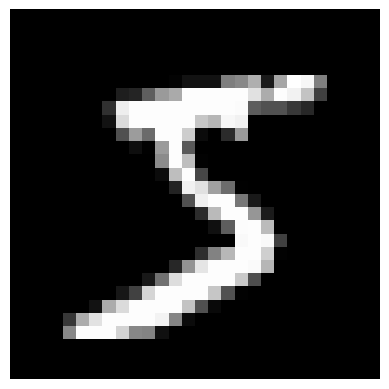

Label 5


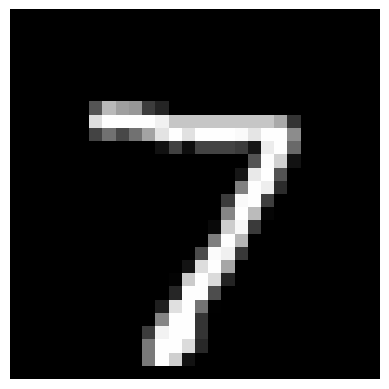

Label 7


In [6]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

## View the first data point in the training set
vis_image(0, "train")

## Now view the first data point in the test set
vis_image(0, "test")

## Splitting the Train data to Train and Validate Sets

In [7]:
from sklearn.model_selection import train_test_split
trainx, valx, trainy, valy = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)

scaler= StandardScaler()

trainx = scaler.fit_transform(trainx)
test_data = scaler.fit_transform(test_data)
valx= scaler.fit_transform(valx)

## 1. K-Nearest neighbor classifier--Brute Force Approach

Use the built-in KNN classifier to perform handwritten digit classification task. Please keep in mind that any hyper-parameter selection shall be performed on the independent validation set and not on the test set. You need to study the KNeighborsClassifier documentation to understand how to use the api with different parameters. In this set of experiments, you need to select 'brute' for the **algorithm** parameter. Record the error rates on the test set and the cpu time taken for evaluation.

**Note:** Here you don't have to implement the KNN classifier but you just need to use it from ``sklearn`` library.

In [8]:
### START CODE HERE ###
# Function to train and evaluate KNN model
def train_evaluate_knn(k, X_train, y_train, X_val, y_val):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(X_train, y_train)
    val_predictions = knn.predict(X_val)
    return accuracy_score(y_val, val_predictions)

# List of k values to try
k_values = [1 ,3, 5, 7, 9, 11]


# Find the best k using validation set (model calibration)
best_k = 0
best_accuracy = 0

for k in k_values:
    accuracy = train_evaluate_knn(k, trainx, trainy, valx, valy)
    print(f"k={k}, Validation Accuracy: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nBest k: {best_k}")

# Train the final model with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute')
best_knn.fit(trainx, trainy)

# Evaluate on test set
start_time = time.time()
test_predictions = best_knn.predict(test_data)
end_time = time.time()

test_accuracy = accuracy_score(test_labels, test_predictions)
test_error_rate = 1 - test_accuracy
cpu_time = end_time - start_time

print(f"\nTest Error Rate: {test_error_rate:.4f}")
print(f"CPU Time for Inference: {cpu_time:.4f} seconds")
### END CODE HERE ###

k=1, Validation Accuracy: 0.9458
k=3, Validation Accuracy: 0.9460
k=5, Validation Accuracy: 0.9453
k=7, Validation Accuracy: 0.9421
k=9, Validation Accuracy: 0.9400
k=11, Validation Accuracy: 0.9372

Best k: 3

Test Error Rate: 0.0577
CPU Time for Inference: 3.0484 seconds


## 2. Faster nearest neighbor methods

Performing nearest neighbor classification in the way we have presented requires a full pass through the training set in order to classify a single point. If there are $N$ training points in $\mathbb{R}^d$, this takes $O(N d)$ time.

Fortunately, there are faster methods to perform nearest neighbor look up if we are willing to spend some time preprocessing the training set. `scikit-learn` has fast implementations of two useful nearest neighbor data structures: the _ball tree_ and the _k-d tree_. Record the error rates on the test set and the cpu time taken for evaluation using these two faster methods.

**Note:** You need to select 'ball_tree'or 'kd_tree' for the **algorithm** parameter for ``KNeighborsClassifier`` classifier.

In [9]:
# You can use KNeighborsClassifier with correct values for 'algorithm'
### START CODE HERE ###
# Function to evaluate KNN with different algorithms
def evaluate_knn(algorithm, X_train, y_train, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm=algorithm)
    
    # Training time
    train_start = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - train_start
    
    # Testing time
    test_start = time.time()
    test_predictions = knn.predict(X_test)
    test_time = time.time() - test_start
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, test_predictions)
    
    return accuracy, train_time, test_time

# List of algorithms to try
algorithms = ['ball_tree', 'kd_tree']
k = 3


# Evaluate each algorithm
for alg in algorithms:
    accuracy, train_time, test_time = evaluate_knn(alg, trainx, trainy, test_data, test_labels, k)
    print(f"\nAlgorithm: {alg}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Inference Time: {train_time:.4f} seconds")
    print(f"Testing Time: {test_time:.4f} seconds")
### END CODE HERE ###


Algorithm: ball_tree
Accuracy: 0.9423
Inference Time: 3.7587 seconds
Testing Time: 399.3969 seconds

Algorithm: kd_tree
Accuracy: 0.9423
Inference Time: 5.0498 seconds
Testing Time: 623.8043 seconds


## 3. Record CPU time and accuracy for all the three approaches in different datasets

Use brute-force, kd-tree, and ball-tree approaches for the following datasets and record the accuracies and cpu time (for evaluation step only). Looking at the results, can you explain it.

Datasets:
1. Abalone Data Set (https://archive.ics.uci.edu/ml/datasets/abalone)
2. Statlog (Landsat Satellite) Data Set (https://archive.ics.uci.edu/ml/datasets/Statlog+(Landsat+Satellite))

**Note:** The datasets are provided as attachement in the assignment as CSV files.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = np.genfromtxt('/kaggle/input/dataset/Abalone19.csv', delimiter = ',')
data = data[:,1:]
X=data[:,:-1]
y=data[:,-1]
y = y.astype(np.int64)
trainx, tempx, trainy, tempy = train_test_split(X, y, test_size=0.30, random_state=42)
valx, testx, valy, testy = train_test_split(tempx, tempy, test_size=0.5, random_state=42)

scaler = StandardScaler()

trainx = scaler.fit_transform(trainx)
valx = scaler.fit_transform(valx)
testx = scaler.fit_transform(testx)

algorithms = ['brute', 'kd_tree', 'ball_tree']

k_values = [29,31,33,35,37,39,41,43]

best_k = 0
val_acc = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(trainx, trainy)
    y_pred = knn.predict(valx)
    acc = accuracy_score(y_pred,valy)
    if acc  > val_acc:
        best_k = k
        val_acc = acc

for algorithm in algorithms:
    knn = KNeighborsClassifier(n_neighbors=best_k, algorithm=algorithm)
    knn.fit(trainx, trainy)
    start_time = time.time()
    y_pred_test = knn.predict(testx)
    end_time = time.time()
    acc_test = accuracy_score(y_pred_test,testy)
    print(f'Algorithms: {algorithm}')
    print(f'Validation Accuracy: {val_acc:.4f}')
    print(f'Test Accuracy: {acc_test:.4f}')
    print(f'CPU Time: {end_time - start_time:.4f}s\n')
    

    
    
    


Algorithms: brute
Validation Accuracy: 0.2919
Test Accuracy: 0.2791
CPU Time: 0.0520s

Algorithms: kd_tree
Validation Accuracy: 0.2919
Test Accuracy: 0.2791
CPU Time: 0.0508s

Algorithms: ball_tree
Validation Accuracy: 0.2919
Test Accuracy: 0.2791
CPU Time: 0.0587s



In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = np.genfromtxt('/kaggle/input/dataset/186_satimage.csv', delimiter = ',')
X=data[:,:-1]
y=data[:,-1]
y = y.astype(np.int64)
trainx, tempx, trainy, tempy = train_test_split(X, y, test_size=0.30, random_state=45)
valx, testx, valy, testy = train_test_split(tempx, tempy, test_size=0.5, random_state=42)

scaler = StandardScaler()

trainx = scaler.fit_transform(trainx)
valx = scaler.fit_transform(valx)
testx = scaler.fit_transform(testx)

algorithms = ['brute', 'kd_tree', 'ball_tree']

k_values = [1,3,5,7,9,11,13]

best_k = 0
val_acc = 0
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(trainx, trainy)
    y_pred = knn.predict(valx)
    acc = accuracy_score(y_pred,valy)
    if acc  > val_acc:
        best_k = k
        val_acc = acc
        
print(f'best k {best_k}')

for algorithm in algorithms:
    knn = KNeighborsClassifier(n_neighbors=best_k, algorithm=algorithm)
    knn.fit(trainx, trainy)
    start_time = time.time()
    y_pred_test = knn.predict(testx)
    end_time = time.time()
    acc_test = accuracy_score(y_pred_test,testy)
    print(f'Algorithms: {algorithm}')
    print(f'Validation Accuracy: {val_acc:.4f}')
    print(f'Test Accuracy: {acc_test:.4f}')
    print(f'CPU Time: {end_time - start_time:.4f}s\n')
    

    
    
    


best k 7
Algorithms: brute
Validation Accuracy: 0.9098
Test Accuracy: 0.9098
CPU Time: 0.0777s

Algorithms: kd_tree
Validation Accuracy: 0.9098
Test Accuracy: 0.9098
CPU Time: 0.1889s

Algorithms: ball_tree
Validation Accuracy: 0.9098
Test Accuracy: 0.9098
CPU Time: 0.1877s



## E1. Extra Stuff

You are invited to try some more ideas as extra work like:
1. Instead of using the pixels as features, implement your own features (example: what were presented in the slides) and use them for KNN. You need to keep in mind that if you compute features which have different scales then it is important to scale/normalize the features (discussed in the slides).

In [ ]:
#Check lectures

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np


X_train_flattened = trainx.reshape(trainx.shape[0], -1)
X_val_flattened = valx.reshape(valx.shape[0], -1)
X_test_flattened = test_data.reshape(test_data.shape[0], -1)



k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

# Variables to store the best k and accuracy
best_k = 0
best_val_acc = 0


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(X_train_flattened_scaled, trainy)
    
    y_pred_val = knn.predict(X_val_flattened_scaled)
    val_acc = accuracy_score(y_pred_val, valy)
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_k = k

print(f'Best k for flattened image: {best_k}, Validation Accuracy: {best_val_acc:.4f}')

# Step 5: Evaluate on the test set using the best k
knn = KNeighborsClassifier(n_neighbors=best_k, algorithm='brute')
knn.fit(X_train_flattened_scaled, trainy)

start_time = time.time()
y_pred_test = knn.predict(X_test_flattened_scaled)
end_time = time.time()

test_acc = accuracy_score(y_pred_test, test_labels)
print(f'Test Accuracy for Flattened Image: {test_acc:.4f}')
print(f'CPU Time for Flattened Image: {end_time - start_time:.4f}s')


Best k for flattened image: 3, Validation Accuracy: 0.9460
Test Accuracy for Flattened Image: 0.9423
CPU Time for Flattened Image: 3.7090s


## Points to remember

You need to keep in mind the following points:
1. Use numpy arrays and numpy libraries for efficient computations. 